In [1]:
import numpy as np
import scanpy as sc
import os
import numpy as np
import torch
import pandas as pd
from sklearn import metrics
import multiprocessing as mp
from stGACN import stGACN
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
os.environ['R_HOME'] = "/home/zhangxinming/anaconda3/envs/Test/lib/R"

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
adata = sc.read('/home/zhangxinming/mymodel/Data/CNS/CNS1.h5ad')
adata

AnnData object with n_obs × n_vars = 25948 × 1022
    obs: 'Sub_molecular_cell_type', 'Main_molecular_tissue_region', 'Sub_molecular_tissue_region', 'Molecular_spatial_cell_type', 'slice'
    uns: 'Main_molecular_tissue_region_palette'
    obsm: 'spatial', 'spatial_raw'

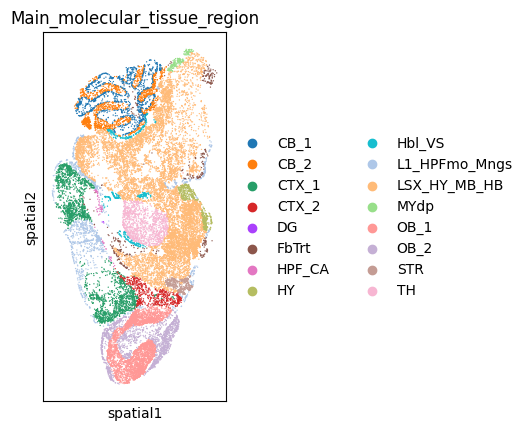

In [3]:
sc.pl.spatial(adata,color = 'Main_molecular_tissue_region',spot_size=300)

In [4]:
model = stGACN.stGACN(adata,k_cutoff=8,neighborhood=8,device=device,model_select = 'KNN')
# train model
adata = model.train()

Graph_1 Construction
The graph contains 181636 edges, 25948 cells.
7.0000 neighbors per cell on average.
Graph constructed!
Graph_2 Construction
The graph contains 207584 edges, 25948 cells.
8.0000 neighbors per cell on average.
Begin to train ST data...


  0%|          | 0/800 [00:00<?, ?it/s]

Overall loss : tensor(24.7554, device='cuda:0', grad_fn=<AddBackward0>)


 13%|█▎        | 101/800 [00:43<05:48,  2.01it/s]

Overall loss : tensor(15.4988, device='cuda:0', grad_fn=<AddBackward0>)


 25%|██▌       | 201/800 [01:26<05:00,  2.00it/s]

Overall loss : tensor(14.0902, device='cuda:0', grad_fn=<AddBackward0>)


 38%|███▊      | 301/800 [02:10<04:12,  1.98it/s]

Overall loss : tensor(12.2245, device='cuda:0', grad_fn=<AddBackward0>)


 50%|█████     | 401/800 [02:53<03:18,  2.01it/s]

Overall loss : tensor(11.8306, device='cuda:0', grad_fn=<AddBackward0>)


 63%|██████▎   | 501/800 [03:37<02:30,  1.98it/s]

Overall loss : tensor(11.6084, device='cuda:0', grad_fn=<AddBackward0>)


 75%|███████▌  | 601/800 [04:20<01:39,  1.99it/s]

Overall loss : tensor(11.4269, device='cuda:0', grad_fn=<AddBackward0>)


 88%|████████▊ | 701/800 [05:03<00:49,  2.00it/s]

Overall loss : tensor(11.2320, device='cuda:0', grad_fn=<AddBackward0>)


100%|██████████| 800/800 [05:46<00:00,  2.31it/s]


Optimization finished for ST data!


In [5]:
# set radius to specify the number of neighbors considered during refinement
radius = 50
tool = 'mclust' # mclust, leiden, and louvain
n_clusters = 16
# clustering
from stGACN.utils import clustering

if tool == 'mclust':
   clustering(adata, n_clusters, radius=radius, method=tool, refinement=False) # For DLPFC dataset, we use optional refinement step.
elif tool in ['leiden', 'louvain']:
   clustering(adata, n_clusters, radius=radius, method=tool, start=0.1, end=1.4, increment=0.01, refinement=False)

R[write to console]:                    __           __ 
   ____ ___  _____/ /_  _______/ /_
  / __ `__ \/ ___/ / / / / ___/ __/
 / / / / / / /__/ / /_/ (__  ) /_  
/_/ /_/ /_/\___/_/\__,_/____/\__/   version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



fitting ...
  |======================================================================| 100%


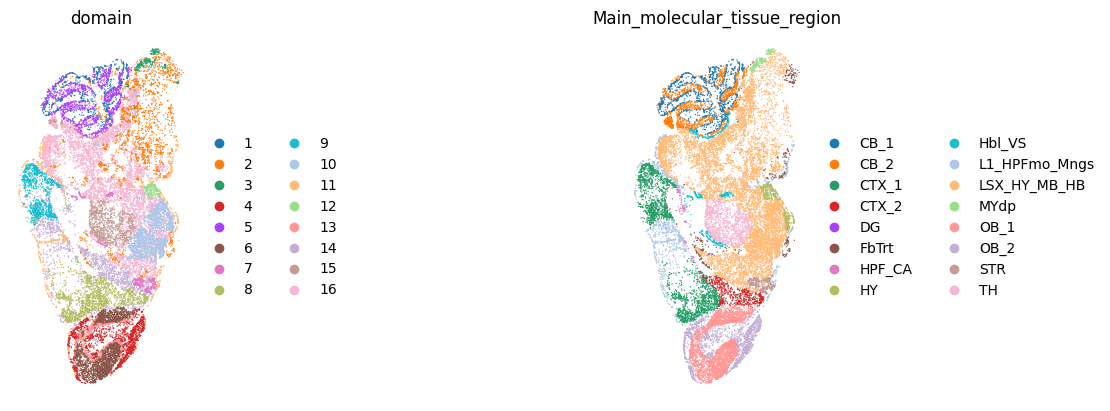

In [6]:
import matplotlib.pyplot as plt
sc.pl.spatial(adata,color = ['domain','Main_molecular_tissue_region'],frameon = False,colorbar_loc=None,spot_size=300)

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


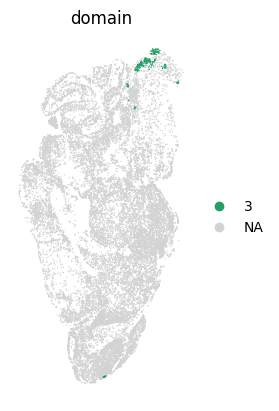

/home/zhangxinming/anaconda3/envs/Test/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:1171: FutureWarning: Categorical.replace is deprecated and will be removed in a future version. Use Series.replace directly instead.
  values = values.replace(values.categories.difference(groups), np.nan)


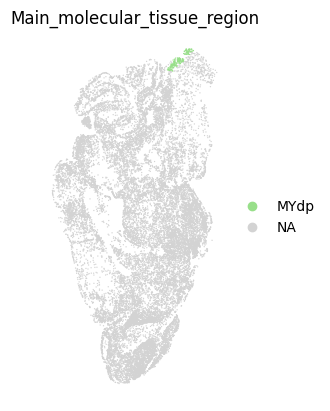

In [7]:
sc.pl.spatial(adata,color = ['domain'],frameon = False,colorbar_loc=None,groups=[3],spot_size=300)
sc.pl.spatial(adata,color = ['Main_molecular_tissue_region'],frameon = False,colorbar_loc=None,groups=['MYdp'],spot_size=300)